This notebook contains code to understand and profile various linear algebra python libraries in numpy, pytorch, etc.

In [55]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time

Determinants

- [numpy.linalg.det](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)
    - computed via LU factorization using the LAPACK routine z/dgetrf
- np.linalg.inv

In [56]:
random_square_matrices = {}
np.random.seed(0)
orders = [10, 500, 1000, 1500, 2000]
for n in orders:
    random_square_matrices[n] = {
        'N': n,
        'matrices': [np.random.rand(n, n) for _ in range(10)]
    }

In [57]:
experiments = []

In [60]:
# compute det of ranodm square matrices and plot observed time taken and values of determinants
def run_computation(matrix, function):
    sanity_check_result = None
    start = time.time()
    if function == 'np.linalg.det':
        sanity_check_result = np.linalg.det(matrix)
    elif function == 'np.linalg.inv':
        inv_mat = np.linalg.inv(matrix)
        # count bad values like nan and inf
        sanity_check_result = np.sum(np.isnan(inv_mat)) + np.sum(np.isinf(inv_mat))
    else:
        raise ValueError('Invalid function: ' + function)
    end = time.time()
    return end - start, sanity_check_result

functions = ['np.linalg.det', 'np.linalg.inv']
for idx, order in enumerate(orders):
    for matrix in random_square_matrices[order]['matrices']:
        for function in functions:
            time_taken, val = run_computation(matrix, function)
            experiments.append({
                'N': order,
                'time': time_taken,
                'sanity_check': val,
                'method': function
            })

c:\Users\mohitvyas\Miniconda3\envs\py39\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


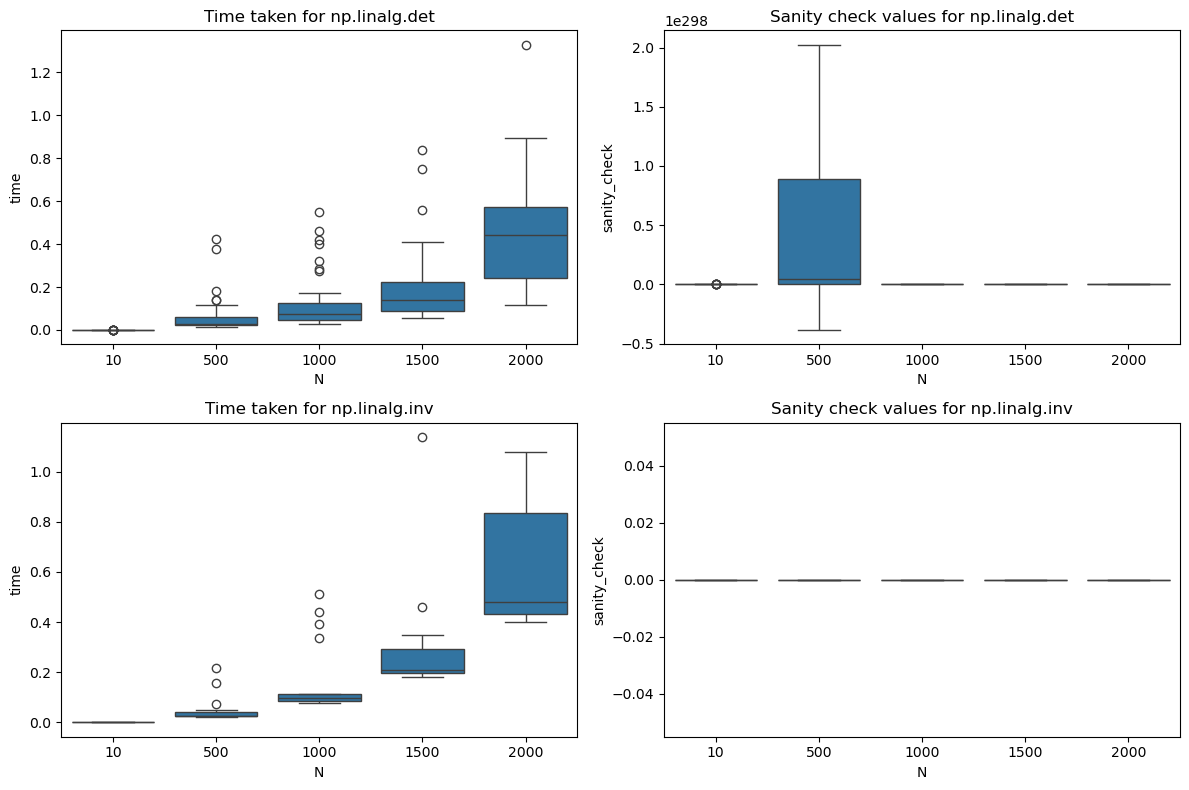

In [63]:
# plot the results side by side. Box plot of time taken and boxplot of sanity check values
# one row for each function-method pair

df = pd.DataFrame(experiments)

fig, ax = plt.subplots(len(functions), 2, figsize=(12, 4 * len(functions)))
for idx, function in enumerate(functions):
    sns.boxplot(x='N', y='time', data=df[df['method'] == function], ax=ax[idx][0])
    sns.boxplot(x='N', y='sanity_check', data=df[df['method'] == function], ax=ax[idx][1])
    ax[idx][0].set_title('Time taken for ' + function)
    ax[idx][1].set_title('Sanity check values for ' + function)
plt.tight_layout()
plt.show()